In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023 (1).csv


In [ ]:
df = pd.read_csv('spotify-2023.csv',encoding='latin1')

In [ ]:
df = df.drop(574)

In [ ]:
df['streams'] = df['streams'].astype(int)

In [ ]:
top_artist = df['artist(s)_name'].value_counts().sort_values(ascending=False).reset_index()
top_10 = top_artist.head(10)
top_10 = top_10.rename(columns={'artist(s)_name':'No. of Songs','index':'Artist'})
top_10

,Artist,No. of Songs
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17
5,Kendrick Lamar,12
6,Morgan Wallen,11
7,Ed Sheeran,9
8,"Drake, 21 Savage",8
9,BTS,8


In [ ]:
top = df.groupby(by='artist(s)_name')[['track_name','streams']]

In [ ]:
pip install kaleido==0.1.0

In [ ]:
import plotly.express as px
import plotly.io as pio
import kaleido
fig = px.bar(top_10, x='Artist',y='No. of Songs',title='Top 10 No. of Appearances in Spotify Most Streamed 1000 Songs of 2023',width=1000,height=600)
fig.update_traces(text=top_10['No. of Songs'], textposition='outside',textfont=dict(size=16))
fig.update_traces(text=top_10['No. of Songs'], textposition='outside',textfont=dict(size=16))
fig.update_layout(
    legend_title_text='Legend',
    xaxis_title_font=dict(size=20),
    yaxis_title_font=dict(size=20),
       title_font=dict(size=25)
)
fig.update_xaxes(tickfont=dict(size=16))
fig.update_yaxes(tickfont=dict(size=16))
fig.show()
pio.write_image(fig, 'figure1.png', format='png',scale=2)
#mention in data analysis royalty pay-out
#only two female artists in top ten

In [ ]:
top_2023 = df.loc[df['released_year']==2023]
artists_2023 = top_2023.groupby(by='artist(s)_name')['streams'].sum().sort_values(ascending=False).reset_index()
top_10_23 = artists_2023.head(10)
top_10_23['streams'] = round(top_10_23['streams']/1000000,1)
top_10_23 = top_10_23.rename(columns={'artist(s)_name':'Artist','streams':'Total Streams'})
top_10_23

<ipython-input-81-290ff446aaa7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Artist,Total Streams
0,Miley Cyrus,1316.9
1,Morgan Wallen,946.7
2,"Eslabon Armado, Peso Pluma",726.0
3,"Shakira, Bizarrap",722.0
4,Jimin,705.4
5,Fifty Fifty,636.5
6,"Karol G, Shakira",619.0
7,"Peso Pluma, Yng Lvcas",553.6
8,NewJeans,518.8
9,"Ariana Grande, The Weeknd",518.7


In [ ]:
id_df = top_2023.groupby(by='artist(s)_name')['streams'].idxmax()
top_songs = top_2023.loc[id_df].reset_index(drop=True)
top_songs = top_songs.rename(columns={'artist(s)_name':'Artist'})
top_songs['streams'] = round(top_songs['streams']/1000000,1)
top_songs_merged = pd.merge(top_10_23, top_songs, on='Artist',how='inner')
top_merged_23 = merged_df = pd.merge(top_10_23, top_songs_merged[['Artist', 'track_name','streams']],
                                     on='Artist', how='left', suffixes=('Total Streams', 'streams'))
top_merged_23['proportion'] = top_merged_23['streams']/top_merged_23['Total Streams']
top_merged_23 = top_merged_23.rename(columns={'streams':'Top Song'})

In [ ]:
top_merged_23

,Artist,Total Streams,track_name,Top Song,proportion
0,Miley Cyrus,1316.9,Flowers,1316.9,1.000000
1,Morgan Wallen,946.7,Last Night,429.8,0.453998
2,"Eslabon Armado, Peso Pluma",726.0,Ella Baila Sola,726.0,1.000000
3,"Shakira, Bizarrap",722.0,"Shakira: Bzrp Music Sessions, Vol. 53",722.0,1.000000
4,Jimin,705.4,Like Crazy,363.4,0.515169
5,Fifty Fifty,636.5,Cupid - Twin Ver.,496.8,0.780518
6,"Karol G, Shakira",619.0,TQG,619.0,1.000000
7,"Peso Pluma, Yng Lvcas",553.6,La Bebe - Remix,553.6,1.000000
8,NewJeans,518.8,OMG,431.0,0.830763
9,"Ariana Grande, The Weeknd",518.7,Die For You - Remix,518.7,1.000000


In [ ]:
fig = px.bar(top_merged_23, x='Artist', y=['Total Streams', 'Top Song'],
             title='Top 10 Artists and Their Most Streamed Songs of 2023',
             labels={'value': 'Top Song', 'variable': 'Metric'},
             color_discrete_map={'Total Streams': '#1DB954', 'Top Song': '#191414'},
             width=1000, height=700,
             barmode='overlay')

fig.update_traces(text=top_merged_23['Total Streams'], textposition='outside',
                  selector=dict(name='Total Streams'),textfont=dict(size=16))
fig.update_traces(text=top_merged_23['Top Song'], textposition='outside',
                  selector=dict(name='Top Song'),textfont=dict(size=16))

fig.update_traces(
    hovertemplate='%{y:.2f} million streams<br>Total Streams: %{customdata[0]:,.2f} million<br>Most Streamed Song: %{customdata[1]}<br>Proportion: %{customdata[2]:.2%}',
    customdata=top_merged_23[['Total Streams', 'track_name', 'proportion']])

fig.update_layout(
    legend_title_text='Legend',
    yaxis_title='Streams (Millions)',
    xaxis_title_font=dict(size=20),
    yaxis_title_font=dict(size=20),
       title_font=dict(size=25)
)
fig.update_xaxes(tickfont=dict(size=16))
fig.update_yaxes(tickfont=dict(size=16))
fig.show()
pio.write_image(fig, 'figure2.png', format='png',scale=2)

In [ ]:
df['date'] = pd.to_datetime(df[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1))
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


In [ ]:
df = df.drop(439)

In [ ]:
old_song = df.loc[df['released_year']<= 1980].sort_values(by='released_year',ascending=True)[['track_name','artist(s)_name','released_year']].head(10)
old_song = old_song.reset_index().drop(columns='index')
old_song

table = go.Figure(data=[go.Table(
    header=dict(values=['Track Name','Artist(s)','Year of Release']),
    cells=dict(values=[old_song[col] for col in old_song.columns]))
])
# Show the table
table.update_layout(width=800, height=600)
fig.show()
pio.write_image(table, 'table.png', format='png',scale=2)
#maybe not as interesting?

In [ ]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '').astype(int)

In [ ]:
df = df.rename(columns={'in_spotify_playlists':'s_plist','in_apple_playlists':'a_plist','in_deezer_playlists':'d_plist'})
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,s_plist,in_spotify_charts,streams,a_plist,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


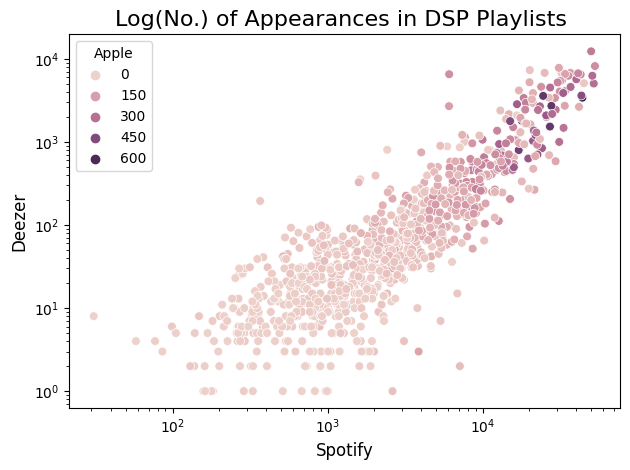

In [ ]:
sns.scatterplot(data=df,x='s_plist',y='d_plist',hue='a_plist',s=40)
plt.title('Log(No.) of Appearances in DSP Playlists ',fontsize=16)
plt.xlabel('Spotify',fontsize=12)
plt.ylabel('Deezer',fontsize=12)
plt.legend(title='Apple')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('figure3.png', format='png', dpi=300)

In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 's_plist', 'in_spotify_charts',
       'streams', 'a_plist', 'in_apple_charts', 'd_plist', 'in_deezer_charts',
       'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%', 'date'],
      dtype='object')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify_3.csv to spotify_3.csv


In [ ]:
spotify_3 = pd.read_csv('spotify_3.csv')

In [ ]:
spotify_3

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
spotify_3.groupby(by='track_genre')['popularity'].median().sort_values(ascending=False).head(50)

track_genre
pop                  66.0
pop-film             60.0
k-pop                60.0
hip-hop              58.0
chill                57.0
metal                57.0
grunge               55.0
sad                  54.0
progressive-house    52.0
british              52.0
deep-house           51.0
emo                  51.0
psych-rock           51.0
metalcore            50.0
electro              50.0
piano                50.0
anime                50.0
ambient              50.0
mandopop             49.0
indian               49.0
electronic           48.0
edm                  47.0
indie                47.0
sertanejo            47.0
acoustic             47.0
indie-pop            47.0
pagode               45.0
brazil               45.0
alt-rock             45.0
world-music          44.0
dub                  44.0
dubstep              44.0
songwriter           43.0
techno               43.0
singer-songwriter    43.0
funk                 43.0
mpb                  42.0
r-n-b                42.0


In [ ]:
spotify_3.groupby(by='track_genre')['popularity'].mean().sort_values(ascending=False).tail(10)

track_genre
idm               15.766
kids              14.888
grindcore         14.625
jazz              13.628
classical         13.055
chicago-house     12.339
detroit-techno    11.174
latin              8.297
romance            3.245
iranian            2.210
Name: popularity, dtype: float64

In [ ]:
genre = spotify_3.groupby(by='track_genre')[['valence','popularity','danceability','energy','tempo','loudness','speechiness','duration_ms']].mean().sort_values(by='valence',ascending=False)

In [ ]:
pop = spotify_3.loc[spotify_3['track_genre']=='pop']['popularity']
pop_film = spotify_3.loc[spotify_3['track_genre']=='pop-film']['popularity']
k_pop = spotify_3.loc[spotify_3['track_genre']=='k-pop']['popularity']
hip_hop = spotify_3.loc[spotify_3['track_genre']=='hip-hop']['popularity']
sad = spotify_3.loc[spotify_3['track_genre']=='sad']['popularity']
chill = spotify_3.loc[spotify_3['track_genre']=='chill']['popularity']
metal = spotify_3.loc[spotify_3['track_genre']=='metal']['popularity']
grunge = spotify_3.loc[spotify_3['track_genre']=='grunge']['popularity']
idm = spotify_3.loc[spotify_3['track_genre']=='idm']
jazz = spotify_3.loc[spotify_3['track_genre']=='jazz']
classical = spotify_3.loc[spotify_3['track_genre']=='classical']

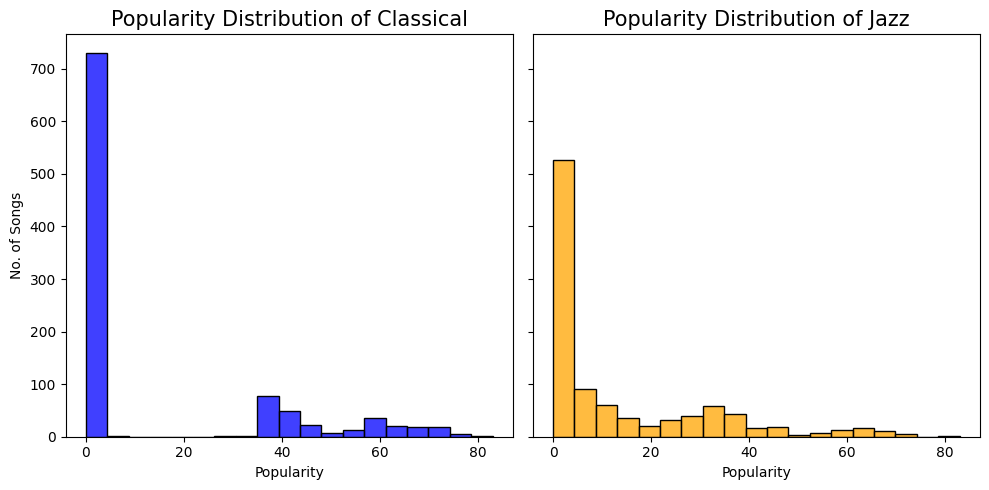

In [ ]:
bin_edges1 = np.linspace(min(min(jazz['popularity']), min(classical['popularity'])), max(max(jazz['popularity']), max(classical['popularity'])), 20)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.histplot(jazz['popularity'], kde=False, color='blue', label='Jazz',bins = bin_edges1,ax=axes[0])
axes[1] = sns.histplot(classical['popularity'], kde=False, color='orange', label='Classical',bins = bin_edges1,ax=axes[1])
axes[1].set_title('Popularity Distribution of Jazz',fontsize=15)
axes[0].set_title('Popularity Distribution of Classical',fontsize=15)
axes[0].set_ylabel('No. of Songs')
axes[0].set_xlabel('Popularity')
axes[1].set_xlabel('Popularity')
plt.tight_layout()
plt.savefig('figure4.png', format='png',dpi=300)

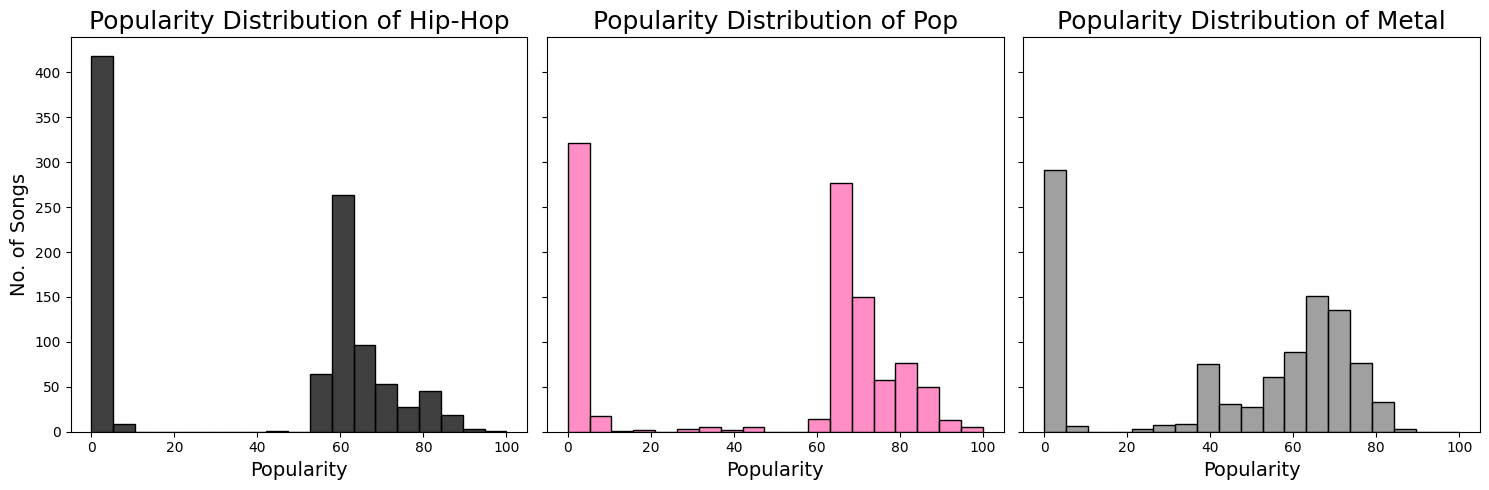

In [ ]:
bin_edges2 = np.linspace(min(min(pop), min(hip_hop),min(metal)), max(max(pop), max(hip_hop),max(metal)),20)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.histplot(hip_hop, kde=False, color='black', label='Hip-Hop',bins=bin_edges2,ax=axes[0])
sns.histplot(pop, kde=False, color='hotpink', label='Pop',bins=bin_edges2,ax=axes[1])
sns.histplot(metal, kde=False, color='grey', label='Metal',bins=bin_edges2,ax=axes[2])
axes[0].set_title('Popularity Distribution of Hip-Hop',fontsize=18)
axes[1].set_title('Popularity Distribution of Pop',fontsize=18)
axes[2].set_title('Popularity Distribution of Metal',fontsize=18)
axes[0].set_ylabel('No. of Songs',fontsize=14)
axes[0].set_xlabel('Popularity',fontsize=14)
axes[1].set_xlabel('Popularity',fontsize=14)
axes[2].set_xlabel('Popularity',fontsize=14)
plt.tight_layout()
plt.savefig('figure5.png', format='png', dpi=300)

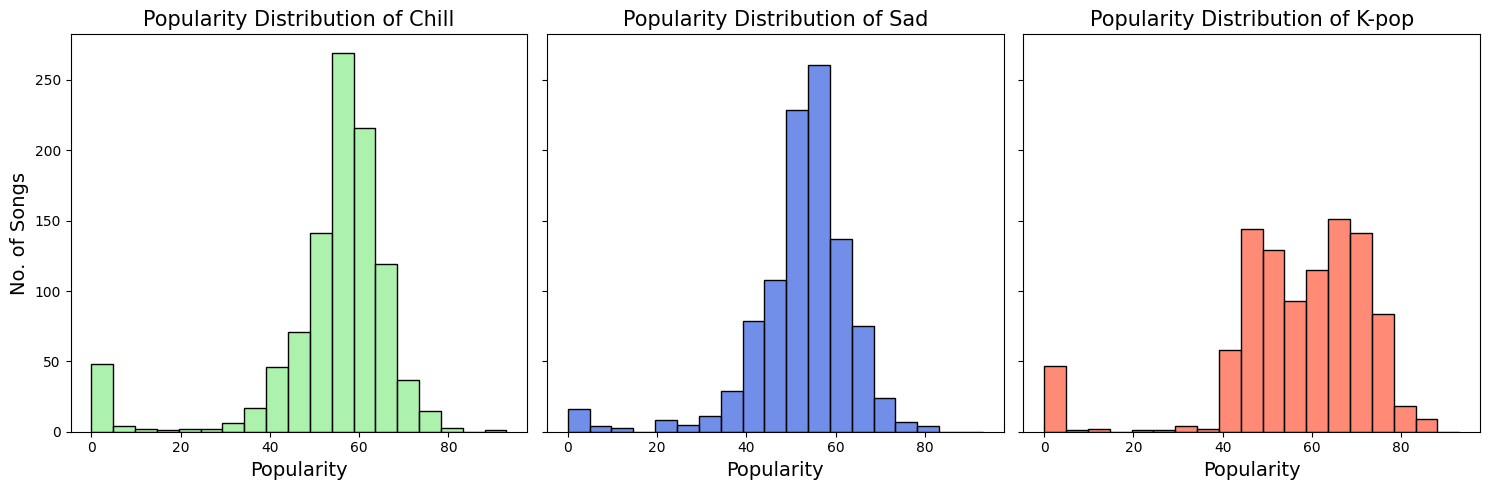

In [ ]:
bin_edges3 = np.linspace(min(min(k_pop), min(sad),min(chill)), max(max(k_pop), max(sad),max(chill)),20)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.histplot(chill, kde=False, color='lightgreen', label='Chill',bins=bin_edges3,ax=axes[0])
sns.histplot(sad, kde=False, color='royalblue', label='Sad',bins=bin_edges3,ax=axes[1])
sns.histplot(k_pop, kde=False, color='tomato', label='Kpop',bins=bin_edges3,ax=axes[2])
axes[0].set_title('Popularity Distribution of Chill',fontsize=15)
axes[1].set_title('Popularity Distribution of Sad',fontsize=15)
axes[2].set_title('Popularity Distribution of K-pop',fontsize=15)
axes[0].set_ylabel('No. of Songs',fontsize=14)
axes[0].set_xlabel('Popularity',fontsize=14)
axes[1].set_xlabel('Popularity',fontsize=14)
axes[2].set_xlabel('Popularity',fontsize=14)
plt.tight_layout()
plt.savefig('figure6.png', format='png', dpi=300)

In [ ]:
%%shell
jupyter nbconvert --to html /Final_Project.ipynb

[NbConvertApp] WARNING | pattern '/Final_Project.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute


CalledProcessError: ignored